In [1]:
from math import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x1 = 0.
x2 = -1. #h < 0
t1 = 0.
t2 = 10

Nx = 100
Mt = 100
h = (x2-x1) / Nx
tau = h**2/2

epsilon = 1e-6
DRAWCHAR = False #show charachteristics plot



In [2]:

def a(u):
	if u > 10:
		return 2.0
	if u < -10:
		return 0
	return 2.0 * exp(2.0*u) / (1.0 + exp(2.0*u))

def F(U, m, n):
	if U[m][n] > 10:
		return 2*U[m][n]
	if U[m][n] < -10:
		return 0
	return log(1.0 + exp(2.0*U[m][n]))

def cha1(x0, tm):
	return [x0 + a(sin(pi*x0)) * t for t in tm]

def cha2(t0, tm):
	return [a(0)*(t-t0) for t in tm]

In [3]:
tm = np.arange(t1,t2,tau)
xn = np.arange(x1,x2,h)

In [4]:

if DRAWCHAR:
	for x0 in np.arange(-2,0,0.05):
		plt.plot(cha1(x0, tm), tm)
	for t0 in np.arange(-1,1,0.1):
		plt.plot(cha2(t0, tm), tm)
	plt.xlabel('x')
	plt.ylabel('t')
	plt.title('Characteristics')
	plt.show()



In [5]:



tm1 = np.arange(t1,t2,tau)
xn1 = np.arange(x1,x2,h)



In [6]:
len(tm)

200000

In [7]:
U = [[0 for x in xn] for t in tm]
# U1 = [[(0.54)**2*pi**2/-0.9*exp(-0.9*t)*sin(pi*x) for x in xn1] for t in tm1]

In [8]:

# starting conditions
for n in range(Nx):
	U[0][n] =  -pi*pi*sin(pi*xn[n])/20
# boundary conditions
for m in range(Mt):
	U[m][0] = 0.
# first approximation
for n in range(Nx)[1:Nx]:
	for m in range(Mt)[1:Mt]:
		U[m][n] = U[m][1]


In [9]:

def f(U, mp1, np1):
	n = np1-1
	m = mp1-1
	return (U[mp1][n]-U[m][n] + U[mp1][np1]-U[m][np1]) /(2.*tau) - (F(U, mp1, np1)-F(U, mp1,n) + F(U, m, np1)-F(U,m,n)) / (2.*h) # 4-point
	#return (U[mp1][np1]-U[m][np1]) / (1.*tau) - (F(U, mp1, np1)-F(U, mp1,n)) / (1.*h) # 3-point implicit
 
def df(U, mp1, np1):
	return 1. / (2.*tau) - a(U[mp1][np1]) / (2.*h) # 4-point
	#return 1. / (1.*tau) - a(U[mp1][np1]) / (1.*h) # 3-point implicit

In [10]:
eps = epsilon + 1; # > epsilon
while eps > epsilon:
	eps = 0
	for m in range(Mt)[0:Mt-1]:
		for n in range(Nx)[0:Nx-1]:
			#print m, n, U[m+1][n+1]
			ep = f(U, m+1, n+1) / df(U, m+1, n+1)
			U[m+1][n+1] = U[m+1][n+1] - ep
			if abs(ep) > eps:
				eps = abs(ep)
	print(eps)

0.5241882711427216
0.03078616418460624
3.0273620637412902e-05
1.7743058397059205e-11


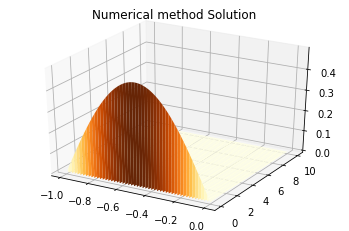

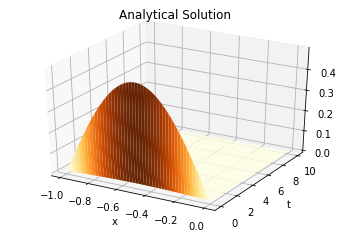

In [17]:

X, T = np.meshgrid(xn, tm)
X1, T1 = np.meshgrid(xn1, tm1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax1 = fig1.add_subplot(111, projection='3d')

U=np.array(U)
# U1=np.array(U1)

plt.title('Numerical method Solution')
surf = ax.plot_surface(X, T, U, cmap='YlOrBr')
plt.show()
U1 = [[1**2*pi**2/-20*exp(-20*t)*sin(pi*x) for x in xn1] for t in tm1]
U1=np.array(U1)
X1, T1 = np.meshgrid(xn1, tm1)

fig1 = plt.figure()

ax1 = fig1.add_subplot(111, projection='3d')
surf1 = ax1.plot_surface(X1, T1, U1, cmap='YlOrBr')

plt.title('Analytical Solution')
plt.xlabel('x')
plt.ylabel('t')
plt.show()
# # surf1 = ax1.plot_surface(X1, T1, U1, cmap='YlOrBr')

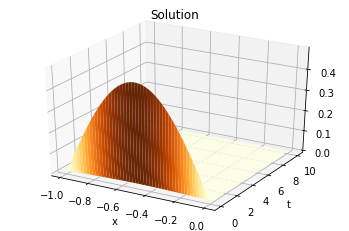

the differences between 10 terms of 20th lines of analytical and numerical solution
0.0012321481521973543
0.0017485261553695508
0.001726841465721607
0.0023754941300067334
0.00226443794150219
0.0029569148063023354
0.0028304268077341543
0.0035026791955824754
0.00341190434420352
0.004020920753488588
numerical matrix terms
[0.03039165 0.04405427 0.0607961  0.07514031 0.09107461 0.10582803]
corresponding analytical matrix terms
[0.03037232 0.04552101 0.06062477 0.0756687  0.09063796 0.10551777]


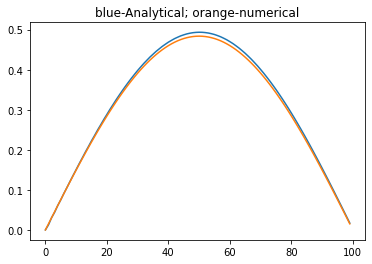

In [22]:
print("the differences between 10 terms of 20th lines of analytical and numerical solution")
for i in range(10,20,1):
    
    print(U[20][i]-U1[20][i])
print("numerical matrix terms")
print(U[20][2:8])
plt.title('blue-Analytical; orange-numerical')
plt.plot(U[20])
print("corresponding analytical matrix terms")
print(U1[20][2:8])
plt.plot(U1[20])

[-0.          0.01519366  0.03037232  0.04552101  0.06062477  0.0756687
  0.09063796  0.10551777  0.12029345  0.13495041  0.1494742   0.16385046
  0.17806503  0.19210387  0.20595313  0.21959913  0.23302842  0.24622774
  0.25918406  0.2718846   0.28431681  0.29646845  0.3083275   0.31988227
  0.33112136  0.34203367  0.35260844  0.36283522  0.37270393  0.38220482
  0.39132852  0.40006603  0.40840873  0.41634837  0.42387713  0.43098757
  0.43767268  0.44392586  0.44974094  0.45511217  0.46003427  0.46450237
  0.46851206  0.47205939  0.47514085  0.4777534   0.47989447  0.48156194
  0.48275417  0.48346998  0.48370866  0.48346998  0.48275417  0.48156194
  0.47989447  0.4777534   0.47514085  0.47205939  0.46851206  0.46450237
  0.46003427  0.45511217  0.44974094  0.44392586  0.43767268  0.43098757
  0.42387713  0.41634837  0.40840873  0.40006603  0.39132852  0.38220482
  0.37270393  0.36283522  0.35260844  0.34203367  0.33112136  0.31988227
  0.3083275   0.29646845  0.28431681  0.2718846   0.

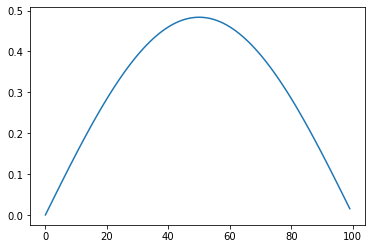